Осталось сделать комплишн, надеюсь всё получится.

In [1]:
# Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
#import scipy as sp
import scipy.ndimage

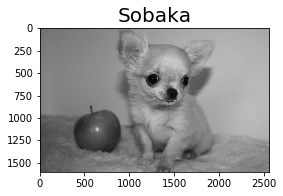

In [2]:
img = np.array(Image.open('dog.png'), dtype=np.float64)
plt.figure(figsize=(14,6))
plt.subplot(131)
plt.title('Sobaka', fontsize=20)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [7]:
def approximate(img, eps): 
    n = 400
    u, s, v = np.linalg.svd(img)
    #n = -1
    img_appr = np.array(img)
    
    while np.linalg.norm(img_appr - img) / np.linalg.norm(img) < eps:
        img_appr = np.dot(u[:, :n] * s[:n], v[:n, :])
        n -= 1
    n += 2
    eps_rank = n
    img_appr = np.dot(u[:, :n] * s[:n], v[:n, :])
    return img_appr, eps_rank


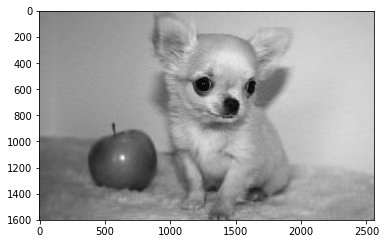

In [4]:
new_img, rank = approximate(img, 0.02)
plt.imshow(new_img, cmap=plt.cm.gray)
plt.show()

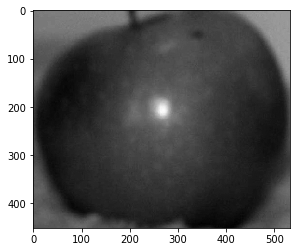

In [5]:
new_img, rank = approximate(img, 0.03)

cropped_img = img[920:1371, 370:903]

plt.imshow(cropped_img, cmap=plt.cm.gray)
plt.show()

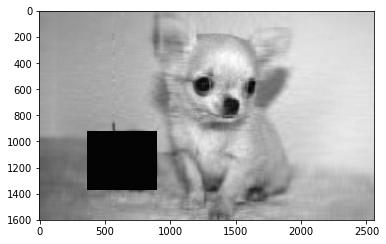

In [6]:
new_img[920:1371, 370:903] =np.ones((1371-920, 903-370))
plt.imshow(new_img, cmap=plt.cm.gray)
plt.show()